# Exploratory Data Analysis

Importing the needed libraries

In [1]:
import numpy as np

import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import datetime 

For reading in the files in parquet form, you might need to install the pyarrow engine from pandas

In [ ]:
#pip install -U pyarrow

Reading in the file data

In [2]:
df = pd.read_parquet('training_set_VU_DM.parquet.gzip', engine = "pyarrow")

Print out the information about the data

In [4]:
print (df.head(n=5))
df.info()

   srch_id            date_time  site_id  visitor_location_country_id  \
0        1  2013-04-04 08:32:15       12                          187   
1        1  2013-04-04 08:32:15       12                          187   
2        1  2013-04-04 08:32:15       12                          187   
3        1  2013-04-04 08:32:15       12                          187   
4        1  2013-04-04 08:32:15       12                          187   

   visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  prop_id  \
0                      NaN                   NaN              219      893   
1                      NaN                   NaN              219    10404   
2                      NaN                   NaN              219    21315   
3                      NaN                   NaN              219    27348   
4                      NaN                   NaN              219    29604   

   prop_starrating  prop_review_score  ...  comp6_rate_percent_diff  \
0                3   

To start with, I will print the correlation matrix for all the variables apart from search id 

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
#new_data = df.drop(['srch_id'], axis = 1)
sns.heatmap(df.corr(),cmap='coolwarm',ax=ax,linewidths=2)

**Analysis of data in regards to time**

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')
just_date = df.groupby([df['date_time'].dt.date]).size()
print (just_date)
print ("Mean number of obesrvations per day = " + str(just_date.mean()))
print ("Minimal number of observations per day = " + str(just_date.min()))
print ("Maximum number of observations per day = " + str(just_date.max()))

In [ ]:
#Was trying to make a histogram of the months with the number of bookings but it didnt work out

booked = df[df["booking_bool"] == 1]
not_booked = df[df["booking_bool"] == 0]

date_col = booked.groupby([booked['date_time'].dt.month])#.size().to_frame(name = 'months').reset_index()
date_col = booked['date_time'].dt.month

not_booked_date = not_booked.groupby([not_booked['date_time'].dt.month])#.size().to_frame(name = 'months').reset_index()
not_booked_date = not_booked['date_time'].dt.month


#not_booked_date = not_booked_date.to_frame()
print (date_col.value_counts())
print (not_booked_date.value_counts())


**Starring analysis** - printing the box plot analysis for stars given for both the costumers and for the hotels

In [ ]:
# Cusotmer Starring 
vis_stars = df['visitor_hist_starrating']
vis_stars.dropna(inplace=True)
#print("Number of not NaN values = " + str(vis_stars.count()))
#print (vis_stars.head)

plt.boxplot(vis_stars)
plt.show()

print("Mean average of the costumers' star rating = " + str(vis_stars.mean()))
print(vis_stars.min())
print(vis_stars.max())

print("\n\n ---------------- \n\n")

# Hotels starring
#prop_stars = df['prop_starrating']
#prop_stars.dropna(inplace=True)
#prop_stars = prop_stars.to_frame()
prop_stars = df[df["prop_starrating"] != 0]
prop_stars = prop_stars['prop_starrating']

plt.boxplot(prop_stars)
plt.show()

print("Mean average of the hotels' star rating = " + str(prop_stars.mean()))
print(prop_stars.min())
print(prop_stars.max())

**Hotel Analysis**

In [ ]:
hotels_id = df['prop_id'].nunique()
print (hotels_id)

countries = df['prop_country_id'].nunique()
print (countries)

visitors = df['visitor_location_country_id'].nunique()
print (visitors)



**There is a booking_bool part in the original data which I cannot find the explanation for in the documentation but I am going to assume that it's if the booking was made or not**


**Analysis of bookings**

In [ ]:
# Search ended up with booking a hotel
booked = df[df["booking_bool"] == 1]
#print (booked.head)

# Histogram of countried to which people travel to most
hist= booked.hist(column ='prop_country_id', bins = 172, figsize=(15,10), xlabelsize = 20)

# countries =  booked.groupby(['prop_country_id'])
# print (countries.size().max)

In [ ]:
test_df = pd.read_parquet('test_set_VU_DM.parquet.gzip', engine = "pyarrow")

In [ ]:
hist= test_df.hist(column ='visitor_location_country_id', bins = 172, figsize=(15,10), xlabelsize = 20)
hist= df.hist(column ='visitor_location_country_id', bins = 172, figsize=(15,10), xlabelsize = 20)


In [ ]:
# Search ended with not booking
not_booked = df[df["booking_bool"] == 0]

#histogram of countried that people search for most 
hist= not_booked.hist(column ='prop_country_id', bins = 172, figsize=(15,10), xlabelsize = 20)

# countries =  not_booked.groupby(['prop_country_id'])
# print (countries.size().max())

In [ ]:
# Plot number of hotels per country

hist_data = df[['prop_id', 'prop_country_id']].copy()
#print(hist_data.head())

hist_data.drop_duplicates(subset = 'prop_id',keep='first', inplace=True)
#print (hist_data)

hist = hist_data.hist(column ='prop_country_id', bins = 172, figsize=(15,10))
#print (hist_data.groupby('prop_country_id').count()) #print number of hotels per country

Plotting possible outliers in the data

In [ ]:
no_ints = df.drop(['srch_id','date_time','site_id','visitor_location_country_id','prop_id','prop_starrating','prop_brand_bool','position','promotion_flag','srch_destination_id','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool','random_bool','click_bool','booking_bool'], axis = 1)
no_ints.info()
#,'prop_country_id'

# Plotting the outliers of the data#

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
no_ints.plot(kind='box', rot=90, ax =ax)

# We're trying to sort out how to fill in the missing values in orig_destination_distance

In [15]:
kurwa = df[['prop_country_id', 'orig_destination_distance']]
odpierdol_sie = df[['srch_id', 'orig_destination_distance']]
chuj = df[['visitor_location_country_id', 'orig_destination_distance']]
#print (kurwa)

In [16]:
kurwa_dwa = kurwa.groupby('prop_country_id').var()
print ("kurwa:")
print (kkk)


pierdol_sie_tez = odpierdol_sie.groupby('srch_id').var()
print ("ppp: ")
print (ppp)


chuj_ci_w_dupe = chuj.groupby('visitor_location_country_id').var()
print ("chuj: ")
print (ccc)

#kurwa[['prop_country_id', 'orig_destination_distance']].to_csv("kurwa.csv")

kurwa:
                 orig_destination_distance
prop_country_id                           
1                             5.979482e+05
2                             1.578031e+06
4                             4.661958e+06
7                             5.186700e-01
9                             1.651266e+06
10                            1.250738e+07
11                            2.287157e+05
13                            5.055384e+06
14                            2.793098e+06
15                            4.524402e+06
16                            3.840478e+06
17                            1.125552e+06
18                            8.874677e+05
19                            3.474517e+06
20                            4.811089e+06
21                            4.534979e+06
22                            6.128522e+06
23                            5.384445e+06
25                            1.607337e+01
26                            5.495894e+06
27                            7.877885e+05
30  

In [ ]:
print ("max:")
print (df['orig_destination_distance'].max())
print ("\n \n min:")
print (df['orig_destination_distance'].min())
print ("\n \n mean:")
print (df['orig_destination_distance'].mean())

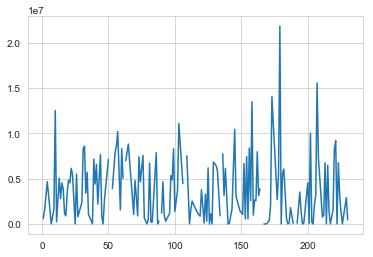

In [21]:
plt.plot(kurwa_dwa)

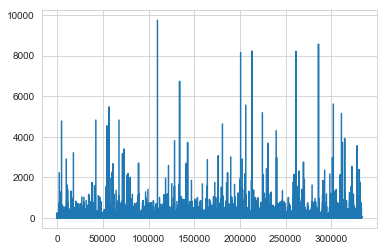

In [20]:
plt.plot(pierdol_sie_tez)

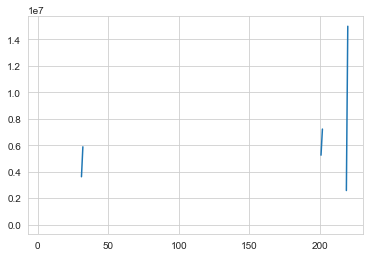

In [22]:
plt.plot(chuj_ci_w_dupe)